# <center> Performance of Machine Learning models on SPECT dataset</center>
<center><i>Suri Bhasker Sri Harsha<br>MS Research Scholar<br>Computer Science Department</i></center>

# What is SPECT ?

A Single Photon Emission Computed Tomography (SPECT) scan is a type of nuclear imaging test that shows how blood flows to tissues and organs.
# How does a SPECT scan work?
<img src="brain.jpg">

A SPECT scan integrates two technologies to view your body: computed tomography (CT) and a radioactive material (tracer). The tracer is what allows doctors to see how blood flows to tissues and organs.

Before the SPECT scan, you are injected with a chemical that is radiolabled, meaning it emits gamma rays that can be detected by the scanner. The computer collects the information emitted by the gamma rays and translates them into two-dimensional cross-sections. These cross-sections can be added back together to form a 3D image of your brain. 

SPECT scans can be done while you rest and during an exercise stress test (called a nuclear stress test). The stress test gives your doctor a better idea of how well your heart handles work. If you can’t exercise, you may get a medicine to increase the blood flow in your heart as if you were exercising. This is called a chemical or pharmacologic stress test.

# Dataset description
The dataset describes diagnosing of cardiac Single Proton Emission Computed Tomography (SPECT) images. Each of the patients is classified into two categories: normal and abnormal. The database of 267 SPECT image sets (patients) was processed to extract features that summarize the original SPECT images. As a result, 44 continuous feature pattern was created for each patient. The CLIP3 algorithm was used to generate classification rules from these patterns. The CLIP3 algorithm generated rules that were 77.0% accurate (as compared with cardilogists' diagnoses). 

Attribute Information:
   1.   OVERALL_DIAGNOSIS: 0,1 (class attribute, binary)
   2.   F1R:   continuous (count in ROI (region of interest) 1 in rest)
   3.   F1S:   continuous (count in ROI 1 in stress)
   4.   F2R:   continuous (count in ROI 2 in rest)
   5.   F2S:   continuous (count in ROI 2 in stress)
   6.   F3R:   continuous (count in ROI 3 in rest)
   7.   F3S:   continuous (count in ROI 3 in stress)
   8.   F4R:   continuous (count in ROI 4 in rest)
   9.   F4S:   continuous (count in ROI 4 in stress)
   10.  F5R:   continuous (count in ROI 5 in rest)
   11.  F5S:   continuous (count in ROI 5 in stress)
   12.  F6R:   continuous (count in ROI 6 in rest)
   13.  F6S:   continuous (count in ROI 6 in stress)
   14.  F7R:   continuous (count in ROI 7 in rest)
   15.  F7S:   continuous (count in ROI 7 in stress)
   16.  F8R:   continuous (count in ROI 8 in rest)
   17.  F8S:   continuous (count in ROI 8 in stress)
   18.  F9R:   continuous (count in ROI 9 in rest)
   19.  F9S:   continuous (count in ROI 9 in stress)
   20.  F10R:  continuous (count in ROI 10 in rest)
   21.  F10S:  continuous (count in ROI 10 in stress)
   22.  F11R:  continuous (count in ROI 11 in rest)
   23.  F11S:  continuous (count in ROI 11 in stress)
   24.  F12R:  continuous (count in ROI 12 in rest)
   25.  F12S:  continuous (count in ROI 12 in stress)
   26.  F13R:  continuous (count in ROI 13 in rest)
   27.  F13S:  continuous (count in ROI 13 in stress)
   28.  F14R:  continuous (count in ROI 14 in rest)
   29.  F14S:  continuous (count in ROI 14 in stress)
   30.  F15R:  continuous (count in ROI 15 in rest)
   31.  F15S:  continuous (count in ROI 15 in stress)
   32.  F16R:  continuous (count in ROI 16 in rest)
   33.  F16S:  continuous (count in ROI 16 in stress)
   34.  F17R:  continuous (count in ROI 17 in rest)
   35.  F17S:  continuous (count in ROI 17 in stress)
   36.  F18R:  continuous (count in ROI 18 in rest)
   37.  F18S:  continuous (count in ROI 18 in stress)
   38.  F19R:  continuous (count in ROI 19 in rest)
   39.  F19S:  continuous (count in ROI 19 in stress)
   40.  F20R:  continuous (count in ROI 20 in rest)
   41.  F20S:  continuous (count in ROI 20 in stress)
   42.  F21R:  continuous (count in ROI 21 in rest)
   43.  F21S:  continuous (count in ROI 21 in stress)
   44.  F22R:  continuous (count in ROI 22 in rest)
   45.  F22S:  continuous (count in ROI 22 in stress)
   
   Here 22 regions of interest were considered. And each region is described during stress and resting.

# Preparing the Data

First we are reading data from the training data using the xlrd library in python<br>
Then we are converting the data into numpy arrays so that it can be fed to the machine learning models.<br>

In [6]:
import xlrd
import numpy as np

workbook= xlrd.open_workbook('/home/bhasker/Documents/Programming/Machine Learning/Mini Project/spectTest.xls')
worksheet = workbook.sheet_by_index(0)

rowNumber = 0
Data = np.zeros((1,45))
while rowNumber<187:

    columnNumber=0
    rowOfTrainingData = np.array([])

    while columnNumber<45:
        featureElement = worksheet.cell(rowNumber,columnNumber).value
        rowOfTrainingData = np.append(rowOfTrainingData,[featureElement])
        columnNumber += 1

    rowNumber += 1
    rowOfTrainingData = rowOfTrainingData.reshape(1,45)
    Data=np.vstack([Data,rowOfTrainingData])

# preparing the labels for the training data
labelVector = np.array([0])
rowNumber = 0
while rowNumber<187:
    featureElement = worksheet.cell(rowNumber,0).value
    labelVector = np.append(labelVector,[featureElement])
    rowNumber += 1
    
workbook2= xlrd.open_workbook('/home/bhasker/Documents/Programming/Machine Learning/Mini Project/spectTrain.xls')
worksheet2 = workbook2.sheet_by_index(0)

rowNumber = 0
while rowNumber<80:

    columnNumber=0
    rowOfTrainingData = np.array([])

    while columnNumber<45:
        featureElement = worksheet2.cell(rowNumber,columnNumber).value
        rowOfTrainingData = np.append(rowOfTrainingData,[featureElement])
        columnNumber += 1

    rowNumber += 1
    rowOfTrainingData = rowOfTrainingData.reshape(1,45)
    Data=np.vstack([Data,rowOfTrainingData])
    
# preparing the labels for the training data
rowNumber = 0
while rowNumber<80:
    featureElement = worksheet2.cell(rowNumber,0).value
    labelVector = np.append(labelVector,[featureElement])
    rowNumber += 1

In [7]:
print(Data)
print("\n Shape of the data is: "+str(Data.shape))

[[  0.   0.   0. ...,   0.   0.   0.]
 [  1.  67.  68. ...,  74.  59.  68.]
 [  1.  75.  74. ...,  58.  57.  52.]
 ..., 
 [  0.  67.  64. ...,  80.  67.  68.]
 [  0.  68.  65. ...,  56.  58.  44.]
 [  0.  66.  54. ...,  68.  59.  59.]]

 Shape of the data is: (268, 45)


# Importing all the required libraries and modules .
The following libraries and modules were imported to build machine learning models and measure their performance.<br>
1. Sklearn : Sklearn is a machine learning library in python which allows for easy implementation of many standard machine learning models.<br>
2. Cross validation module: The module let's us perform cross-validation on our machine learning models. We can set the number of folds here by alterning the "cv" parameter while using the module.<br>
3. Matplotlib.pyplot: This module allows us to plot graphs in python<br>

# K-fold cross validation
<img src="CrossVal.png">
In short, the data is split into "k" parts. Then the model is tested on "k-1" parts iteratively and accuracy is measured.

In [8]:
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt

## Performance of K- Nearest neighbour classifier

Three values for k ie.e. {3,30,100} were tested and it was found that k=30 had the highest performance<br>

When the K value was 100, the performance of the classifier was lower than for K = 30.

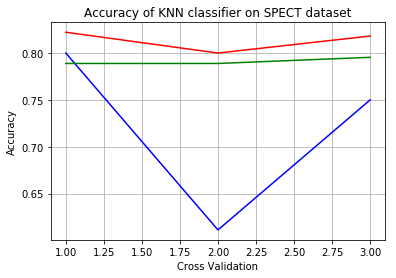

In [20]:
# Fit a K- Nearest neighbour classifier to the data
from sklearn.neighbors import KNeighborsClassifier
KNNClf1 = KNeighborsClassifier(n_neighbors=3)
KNNClf2 = KNeighborsClassifier(n_neighbors=50)
KNNClf3 = KNeighborsClassifier(n_neighbors=100)

# KNN performance on the data using cross validation
KNNScores1 = cross_val_score(KNNClf1, Data[:], labelVector[:], cv=3)
KNNScores2 = cross_val_score(KNNClf2, Data[:], labelVector[:], cv=3)
KNNScores3 = cross_val_score(KNNClf3, Data[:], labelVector[:], cv=3)

#To do: Plot the graphs for various number of K values
plt.plot([1,2,3],KNNScores1,color='b')
plt.plot([1,2,3],KNNScores2,color='r')
plt.plot([1,2,3],KNNScores3,color='g')
plt.xlabel("Cross Validation")
plt.ylabel("Accuracy")
plt.title("Accuracy of KNN classifier on SPECT dataset")
plt.grid()
plt.show()

## Performance of Random Forest Classifier

3 different values for number of estimators were tested i.e..10,50,100<br>

It was found that Random Forest showed highest performance when the number of estimators were 10. The classifier over-fitted to the data when the number of estimators were 100 and overfitted to the data.

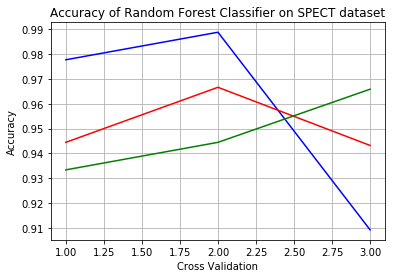

In [9]:
# Fitting a random forest classifier to the data
from sklearn.ensemble import RandomForestClassifier
RFClf1 = RandomForestClassifier(n_estimators=10, max_depth=3,random_state=0)
RFClf2 = RandomForestClassifier(n_estimators=50, max_depth=3,random_state=0)
RFClf3 = RandomForestClassifier(n_estimators=100, max_depth=3,random_state=0)

# Performing cross validation on random forest classifier
RandomForestScores1 = cross_val_score(RFClf1, Data[:], labelVector[:], cv=3)
RandomForestScores2 = cross_val_score(RFClf2, Data[:], labelVector[:], cv=3)
RandomForestScores3 = cross_val_score(RFClf3, Data[:], labelVector[:], cv=3)

# To Do: Plot graphs for various tree depths for the random forest classifier
plt.plot([1,2,3],RandomForestScores1,color='b')
plt.plot([1,2,3],RandomForestScores2,color='r')
plt.plot([1,2,3],RandomForestScores3,color='g')
plt.xlabel("Cross Validation")
plt.ylabel("Accuracy")
plt.title("Accuracy of Random Forest Classifier on SPECT dataset")
plt.grid()
plt.show()

## Performance of Support Vector Machine 

It was observed that SVM classifier showed a maximum accuracy of 91.9 percent.

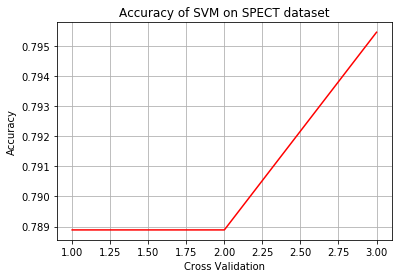

In [10]:
# Fitting an SVM to the data
from sklearn import svm
clf2 = svm.SVC(gamma='auto')

# SVM performance on the data
SVMScores = cross_val_score(clf2, Data[:], labelVector[:], cv=3)

# Plotting the support vector machine scores
plt.plot([1,2,3],SVMScores,color='r')
plt.xlabel("Cross Validation")
plt.ylabel("Accuracy")
plt.title("Accuracy of SVM on SPECT dataset")
plt.grid()
plt.show()

## Fitting a linear Perceptron to the dataset

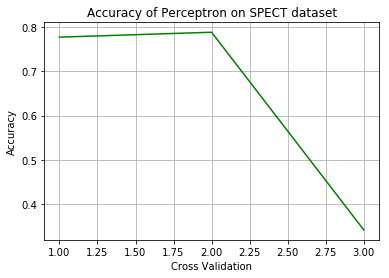

In [11]:
# Fitting a perceptron to the data
from sklearn.linear_model import Perceptron
clf3 = Perceptron(random_state=0)

# Perceptron performance on the data
PerceptronScores = cross_val_score(clf3, Data[:], labelVector[:], cv=3)

# Plotting the perceptron scores
plt.plot([1,2,3],PerceptronScores,color='g')
plt.xlabel("Cross Validation")
plt.ylabel("Accuracy")
plt.title("Accuracy of Perceptron on SPECT dataset")
plt.grid()
plt.show()

## Performance of Multi-layer Perceptron

Number of nodes in the hidden layer were altered and performance in each case was measured.<br>
3 fold cross-validation was performed for each case.<br>

Iteration 1, loss = 4.78634637
Iteration 2, loss = 17.91324364
Iteration 3, loss = 4.78634631
Iteration 4, loss = 4.78634623
Iteration 5, loss = 4.78634616
Iteration 6, loss = 2.72893306
Iteration 7, loss = 2.04776977
Iteration 8, loss = 1.96695123
Iteration 9, loss = 0.89040665
Iteration 10, loss = 0.99186674
Iteration 11, loss = 1.93550871
Iteration 12, loss = 1.23724127
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.
Iteration 1, loss = 4.66176920
Iteration 2, loss = 17.46870452
Iteration 3, loss = 4.66230312
Iteration 4, loss = 4.66231400
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.
Iteration 1, loss = 4.73789315
Iteration 2, loss = 17.63774593
Iteration 3, loss = 4.73839148
Iteration 4, loss = 4.73840425
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.
Iteration 1, loss = 4.78628075
Iteration 2, loss = 2.85970332
Iteration 3, loss = 18.23958689
Iterati

/home/bhasker/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


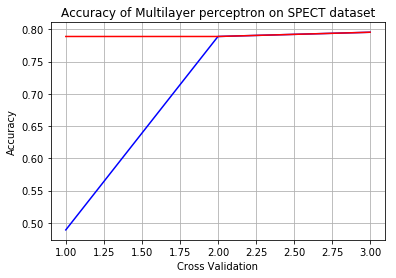

In [29]:
# Fitting an Multi Layer Perceptron to the data
from sklearn.neural_network import MLPClassifier
MLPClf1 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=10000, alpha=0.0001,solver='sgd',verbose=10,random_state=1,tol=0.000000001)
MLPClf2 = MLPClassifier(hidden_layer_sizes=(20), max_iter=100, alpha=0.0001,solver='sgd',verbose=10,random_state=21,tol=0.000000001)
MLPClf3 = MLPClassifier(hidden_layer_sizes=(50), max_iter=10, alpha=0.0001,solver='sgd',verbose=10,random_state=21,tol=0.000000001)

# Multilayer perceptron cross validation on the data
MLPScores1 = cross_val_score(MLPClf1, Data[:], labelVector[:], cv=3)
MLPScores2 = cross_val_score(MLPClf2, Data[:], labelVector[:], cv=3)
MLPScores3 = cross_val_score(MLPClf3, Data[:], labelVector[:], cv=3)

# To do: Plot graphs for various number of nodes in the hidden layers of MLP
plt.plot([1,2,3],MLPScores1,color='b')
plt.plot([1,2,3],MLPScores2,color='r')
#plt.plot([1,2,3],MLPScores3,color='g')
plt.xlabel("Cross Validation")
plt.ylabel("Accuracy")
plt.title("Accuracy of Multilayer perceptron on SPECT dataset")
plt.grid()
plt.show()

# Result

It was found that for the SPECT dataset, the Random forest classifier achieved highest accuracy among all the classifiers.<br>

K nearest neighbour classifier showed second best performance for k=30 value.<br>

The third best performance was given by multi-layer perceptron for hidden layer size of 20.